# ML with Scikit-Learn

Code following along with the opensesame turorial [python machine learning course](https://player.opensesame.com/coursecontent/e0574515-e184-9194-31e9-355866e13f22/232590/00000000-0000-0000-0000-000000000000/62D4A280;de06e6f7424c2da8eefe20a3a55d1d5039561b361b5dd60e332433627667306c/scormcontent/index.html#/).

In [ ]:
%load_ext lab_black

In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap

# set the plot figure size
rcParams["figure.figsize"] = 10, 5
%matplotlib inline

## Training a perceptron via scikit-learn

In [3]:
# load the iris dataset from sklearn
iris = datasets.load_iris()

# separate features and targets
X = iris.data
y = iris.target

In [4]:
# now we'll use 'train_test_split' from sklearn to split the data into training and testing sets
test_size = 0.3  # cold also specify 'train_size=0.7' instead
random_state = 0

# 'train_test_split' convenience function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [5]:
# standardize the data like we did before, but use the
# 'StandardScaler' from sklearn

sc = StandardScaler()

# fit the scaler to the training feature set only
sc.fit(X_train)

# scale (transform) the training AND the testing sets using the
# scaler that was fitted to training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# it is important to transform non-numeric target values into numbers
# prior to splitting the data to avoid unexpected results when modeling
print(f"Unique labels: {np.unique(y)}")

Unique labels: [0 1 2]


In [6]:
# we will select a subset of the features as before
X_train_std = X_train_std[:, [2, 3]]
X_test_std = X_test_std[:, [2, 3]]

In [10]:
# train a model using sklearn's implementation of the perceptron
n_iter = 40
eta0 = 0.1

# create the perceptron instance
ppn = Perceptron(n_iter_no_change=n_iter, eta0=eta0, random_state=random_state)

# fit model to standardized data
ppn.fit(X_train_std, y_train)

# make a prediction
y_pred = ppn.predict(X_test_std)

we can measure performance using the 'accuracy_score' convenience function in sklearn

In [12]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}")

Accuracy: 88.88888888888889


Let's add some functionality to our 'plot_decision_regions' convenience function by highlighting the test samples on our plot

In [34]:
def plot_decision_regions(X, y, classifier, resolution=0.2, test_idx=None):
    """Convenience function for visualizing decision boundaries"""
    # setup marker genearot and clolr map
    # this can handle multi-class plotting
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot the class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            color=cmap(idx),
            marker=markers[idx],
            label=cl,
        )

    ### NEW CODE ######################################
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            facecolors='none',
            edgecolors='black', 
            alpha=1.0,
            linewidths=1,
            marker="o",
            s=65,
            label="test set",
        )

With those modications in place, we can specify the test indices. First we need to re-combine the training and testing datasets

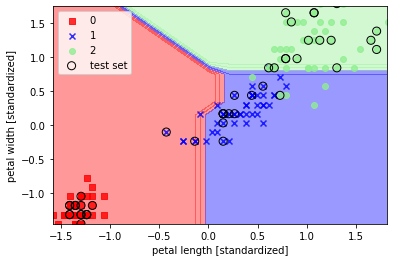

In [35]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

# plot the decision regions
X = X_combined_std
y = y_combined

test_idx = range(105, 150)
plot_decision_regions(X=X, y=y, classifier=ppn, test_idx=test_idx)

# format the labels and legend
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc='upper left')
plt.show()

## Logistic Regression in sklearn

### The logistic function 
The inverse form of the logit function (a.k.a sigmoid funciton)

In [37]:
def sigmoid(z):
    """Return sigmoid values from net input.

    z is the net input or linear combination of the 
    weights and features (like from before)
    """
    return 1.0 / (1.0 + np.exp(-z))

Plot the sigmoid to get a better sense of it's properties

Text(0, 0.5, '$\\phi (z)$')

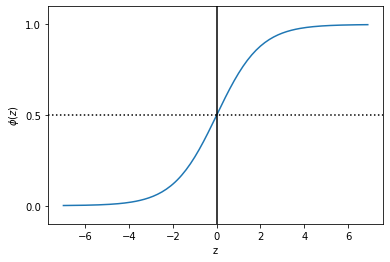

In [39]:
z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)

plt.plot(z, sigmoid(z))

plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor = '1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls="dotted", color='k')
plt.yticks([0, 0.5, 1])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

### Model with the logistic regression algorithm from sklearn

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# params 
C=1000.0
random_state=0
lr = LogisticRegression(C=C, random_state=random_state)

# fit the model
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

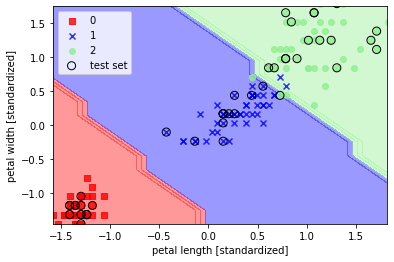

In [42]:
# plot the decision regions

# use the combined datasets and the same test indices as above
plot_decision_regions(X=X, y=y, classifier=lr, test_idx=test_idx)

# format the labels and legend
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc='upper left')
plt.show()

## Predicting Class Probabilities

We can also return probabilities that our sampls belong to each of the classes with logistic regression in sklearn

As of sklearn 0.17, we need to resahpe the data since predictions are only made on a single sample

In [45]:
test_sample = X_test_std[0,:].copy().reshape(1,-1)

probs = lr.predict_proba(test_sample)

# iris species dict
iris_labels_dict = {
    0: "Setosa", 
    1: 'Versicolor',
    2: 'Virginica'
}

class_name = iris_labels_dict
class_number = lr.classes_  # access the classes attribute of our lr
probability = probs[0]  # 'probs' is a nested array once probs are predicted

print("Probability this sample belongs to each class: ")
for i, _ in enumerate(lr.classes_):
    print(f"{class_name[i]} [{class_number[i]}: {probability[i] * 100}")
    

Probability this sample belongs to each class: 
Setosa [0: 99.9958049239997
Versicolor [1: 0.004195076000295965
Virginica [2: 2.3102121189074462e-17


We can look at how differnt values of 'C' effect the regularization strength of the model -->> smaller values of 'C' == more regularization

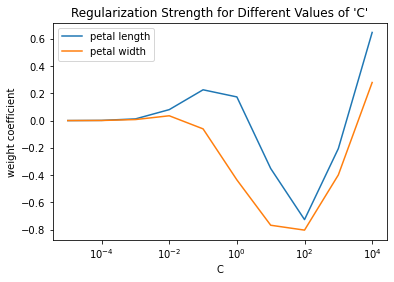

In [47]:
weights, params = [], []
for c in np.arange(-5, 5):
    C = 10. ** c
    lr = LogisticRegression(C=C, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(C)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.title("Regularization Strength for Different Values of 'C'")
plt.xscale('log')

## Training Support Vector Machines (SVM) in sklearn